# Energy usage 2010 Chicago
## Data source
        https://data.cityofchicago.org/api/views/8yq3-m6wp/rows.csv
### The csv has the information of energy consumption for households, businesses, and industries in the City of Chicago during 2010     

## Hypothesis

#### 1.Commercial sector uses more electricity.
#### 2.West town being the richest neighborhood in Chicago, should use more electricity.


In [1]:
#importing libraries
import pandas as pd 
import shutil

In [2]:
months = [str(i) + '/10' for i in range(1, 13)]

In [3]:
# get data
df = pd.read_csv("https://data.cityofchicago.org/api/views/8yq3-m6wp/rows.csv?accessType=DOWNLOAD")
print(len(df))

67051


In [4]:
#looking into the given data to get an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   COMMUNITY AREA NAME                  67051 non-null  object 
 1   CENSUS BLOCK                         66974 non-null  float64
 2   BUILDING TYPE                        66974 non-null  object 
 3   BUILDING_SUBTYPE                     66974 non-null  object 
 4   KWH JANUARY 2010                     66180 non-null  float64
 5   KWH FEBRUARY 2010                    66180 non-null  float64
 6   KWH MARCH 2010                       66180 non-null  float64
 7   KWH APRIL 2010                       66180 non-null  float64
 8   KWH MAY 2010                         66180 non-null  float64
 9   KWH JUNE 2010                        66180 non-null  float64
 10  KWH JULY 2010                        66180 non-null  float64
 11  KWH AUGUST 2010             

In [5]:
#Looking at the top 5 rows of df
df.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [6]:
# work with base dataframe
bdf = df[[
    "AVERAGE BUILDING AGE",
    "AVERAGE HOUSESIZE",
    "AVERAGE STORIES",
    "BUILDING_SUBTYPE",
    "BUILDING TYPE",
    "COMMUNITY AREA NAME",
    "ELECTRICITY ACCOUNTS",
    "GAS ACCOUNTS",
    "KWH MEAN 2010",
    "KWH MAXIMUM 2010",
    "KWH MINIMUM 2010",
    "KWH SQFT MEAN 2010",
    "THERM MEAN 2010",
    "THERM MAXIMUM 2010",
    "THERM MINIMUM 2010",
    "THERMS SQFT MEAN 2010",
    "TOTAL KWH",
    "TOTAL POPULATION",
    "TOTAL THERMS",
]]
bdf.head()

,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,BUILDING_SUBTYPE,BUILDING TYPE,COMMUNITY AREA NAME,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,KWH MEAN 2010,KWH MAXIMUM 2010,KWH MINIMUM 2010,KWH SQFT MEAN 2010,THERM MEAN 2010,THERM MAXIMUM 2010,THERM MINIMUM 2010,THERMS SQFT MEAN 2010,TOTAL KWH,TOTAL POPULATION,TOTAL THERMS
0,71.33,3.87,2.0,Multi < 7,Residential,Archer Heights,NaN,11,NaN,NaN,NaN,NaN,1819.5,2487.0,1061.0,1855.67,NaN,89.0,10917.0
1,41.00,1.81,2.0,Multi 7+,Residential,Ashburn,8,NaN,27354.67,51815.0,8886.0,10892.0,NaN,NaN,NaN,NaN,82064.0,112.0,NaN
2,86.00,3.00,3.0,Multi < 7,Commercial,Auburn Gresham,NaN,4,NaN,NaN,NaN,NaN,3028.5,5963.0,94.0,7347.00,NaN,102.0,6057.0
3,84.00,2.95,2.0,Multi < 7,Commercial,Austin,NaN,Less than 4,NaN,NaN,NaN,NaN,400.0,400.0,400.0,2146.00,NaN,121.0,400.0
4,85.00,3.26,2.0,Multi < 7,Commercial,Austin,NaN,Less than 4,NaN,NaN,NaN,NaN,949.0,949.0,949.0,2146.00,NaN,62.0,949.0


In [7]:
#In above df, we notice there are a lot of nan values. So we will replace them

In [8]:
#Getting new df info
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AVERAGE BUILDING AGE   67051 non-null  float64
 1   AVERAGE HOUSESIZE      67037 non-null  float64
 2   AVERAGE STORIES        67051 non-null  float64
 3   BUILDING_SUBTYPE       66974 non-null  object 
 4   BUILDING TYPE          66974 non-null  object 
 5   COMMUNITY AREA NAME    67051 non-null  object 
 6   ELECTRICITY ACCOUNTS   66180 non-null  object 
 7   GAS ACCOUNTS           65755 non-null  object 
 8   KWH MEAN 2010          66180 non-null  float64
 9   KWH MAXIMUM 2010       66180 non-null  float64
 10  KWH MINIMUM 2010       66180 non-null  float64
 11  KWH SQFT MEAN 2010     65901 non-null  float64
 12  THERM MEAN 2010        65755 non-null  float64
 13  THERM MAXIMUM 2010     65755 non-null  float64
 14  THERM MINIMUM 2010     65755 non-null  float64
 15  TH

In [9]:
#Describing the df
bdf.describe()

,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,KWH MEAN 2010,KWH MAXIMUM 2010,KWH MINIMUM 2010,KWH SQFT MEAN 2010,THERM MEAN 2010,THERM MAXIMUM 2010,THERM MINIMUM 2010,THERMS SQFT MEAN 2010,TOTAL KWH,TOTAL POPULATION,TOTAL THERMS
count,67051.000000,67037.000000,67051.000000,6.618000e+04,6.618000e+04,6.618000e+04,6.590100e+04,6.575500e+04,6.575500e+04,6.575500e+04,6.537800e+04,6.618000e+04,67037.000000,6.575500e+04
mean,71.593006,3.454721,1.887592,6.288298e+04,1.257366e+05,3.680911e+04,7.690970e+03,4.076005e+03,8.247193e+03,2.264914e+03,7.199719e+03,2.375188e+05,105.180169,2.001532e+04
std,34.168384,26.146208,1.957215,1.347881e+06,2.462590e+06,1.199767e+06,6.736307e+04,3.614810e+04,1.339235e+05,2.959248e+04,6.399848e+04,4.294269e+06,801.339175,2.059462e+05
min,0.000000,0.000000,1.000000,1.020000e+02,1.020000e+02,1.000000e+02,3.000000e+02,2.500000e+01,2.500000e+01,2.500000e+01,3.000000e+02,1.020000e+02,0.000000,2.500000e+01
25%,53.000000,2.150000,1.140000,8.232688e+03,1.328875e+04,2.157000e+03,1.326250e+03,1.365805e+03,1.934000e+03,5.905000e+02,1.318533e+03,2.822300e+04,37.000000,4.883000e+03
50%,80.000000,2.700000,1.750000,1.052361e+04,1.804400e+04,4.370000e+03,2.217000e+03,1.843000e+03,2.605000e+03,9.890000e+02,2.202635e+03,6.234150e+04,64.000000,1.035400e+04
75%,96.500000,3.320000,2.000000,1.567650e+04,2.631900e+04,8.766000e+03,3.800000e+03,2.711820e+03,4.083000e+03,1.642000e+03,3.744000e+03,1.183965e+05,105.000000,1.860350e+04
max,158.000000,2061.920000,110.000000,2.277500e+08,3.120986e+08,2.277521e+08,6.548217e+06,6.600274e+06,2.777274e+07,6.600274e+06,6.548217e+06,5.831747e+08,67388.000000,3.966757e+07


In [10]:
#Checking how many null values are present in each column
bdf.isna().sum()

AVERAGE BUILDING AGE        0
AVERAGE HOUSESIZE          14
AVERAGE STORIES             0
BUILDING_SUBTYPE           77
BUILDING TYPE              77
COMMUNITY AREA NAME         0
ELECTRICITY ACCOUNTS      871
GAS ACCOUNTS             1296
KWH MEAN 2010             871
KWH MAXIMUM 2010          871
KWH MINIMUM 2010          871
KWH SQFT MEAN 2010       1150
THERM MEAN 2010          1296
THERM MAXIMUM 2010       1296
THERM MINIMUM 2010       1296
THERMS SQFT MEAN 2010    1673
TOTAL KWH                 871
TOTAL POPULATION           14
TOTAL THERMS             1296
dtype: int64

In [11]:
#Dropping the null values
bdf.dropna(inplace=True)

C:\Users\mohan\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
#Displaying the df info
bdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64145 entries, 103 to 67050
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AVERAGE BUILDING AGE   64145 non-null  float64
 1   AVERAGE HOUSESIZE      64145 non-null  float64
 2   AVERAGE STORIES        64145 non-null  float64
 3   BUILDING_SUBTYPE       64145 non-null  object 
 4   BUILDING TYPE          64145 non-null  object 
 5   COMMUNITY AREA NAME    64145 non-null  object 
 6   ELECTRICITY ACCOUNTS   64145 non-null  object 
 7   GAS ACCOUNTS           64145 non-null  object 
 8   KWH MEAN 2010          64145 non-null  float64
 9   KWH MAXIMUM 2010       64145 non-null  float64
 10  KWH MINIMUM 2010       64145 non-null  float64
 11  KWH SQFT MEAN 2010     64145 non-null  float64
 12  THERM MEAN 2010        64145 non-null  float64
 13  THERM MAXIMUM 2010     64145 non-null  float64
 14  THERM MINIMUM 2010     64145 non-null  float64
 15  

In [13]:
#Checking if any null values still left even after dropping them
bdf.isna().sum()

AVERAGE BUILDING AGE     0
AVERAGE HOUSESIZE        0
AVERAGE STORIES          0
BUILDING_SUBTYPE         0
BUILDING TYPE            0
COMMUNITY AREA NAME      0
ELECTRICITY ACCOUNTS     0
GAS ACCOUNTS             0
KWH MEAN 2010            0
KWH MAXIMUM 2010         0
KWH MINIMUM 2010         0
KWH SQFT MEAN 2010       0
THERM MEAN 2010          0
THERM MAXIMUM 2010       0
THERM MINIMUM 2010       0
THERMS SQFT MEAN 2010    0
TOTAL KWH                0
TOTAL POPULATION         0
TOTAL THERMS             0
dtype: int64

In [14]:
#In ELECTRICITY ACCOUNTS column, we notice there is a item named Less than 4 which cannot be typecasted into int
bdf['ELECTRICITY ACCOUNTS'].value_counts()

Less than 4    10848
4               4877
5               4366
6               4076
7               3632
               ...  
259                1
571                1
416                1
516                1
133                1
Name: ELECTRICITY ACCOUNTS, Length: 310, dtype: int64

In [15]:
#In GAS ACCOUNTS column, we notice there is a item named Less than 4 which cannot be typecasted into int
bdf['GAS ACCOUNTS'].value_counts()

Less than 4    11681
4               4841
6               4101
5               4063
7               3609
               ...  
144                1
383                1
177                1
341                1
98                 1
Name: GAS ACCOUNTS, Length: 160, dtype: int64

In [16]:
#Replacing the Less than 4 item with 2 in ELECTRICITY AND GAS ACCOUNTS columns so that we can easily convert column dtype to int
bdf['ELECTRICITY ACCOUNTS'].replace({"Less than 4": "2"}, inplace=True)
bdf['GAS ACCOUNTS'].replace({"Less than 4": "2"}, inplace=True)

C:\Users\mohan\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
#Converting column dtypes from str to int
bdf['ELECTRICITY ACCOUNTS']=bdf['ELECTRICITY ACCOUNTS'].astype(int)
bdf['GAS ACCOUNTS']=bdf['GAS ACCOUNTS'].astype(int)

C:\Users\mohan\AppData\Local\Temp/ipykernel_17736/4204586990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdf['ELECTRICITY ACCOUNTS']=bdf['ELECTRICITY ACCOUNTS'].astype(int)
C:\Users\mohan\AppData\Local\Temp/ipykernel_17736/4204586990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdf['GAS ACCOUNTS']=bdf['GAS ACCOUNTS'].astype(int)


In [18]:
#What Building sub types do we have?
bdf['BUILDING_SUBTYPE'].value_counts()

Multi < 7        26194
Single Family    26133
Commercial        6921
Multi 7+          4682
Municipal          192
Industrial          23
Name: BUILDING_SUBTYPE, dtype: int64

In [19]:
bdf.head()

,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,BUILDING_SUBTYPE,BUILDING TYPE,COMMUNITY AREA NAME,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,KWH MEAN 2010,KWH MAXIMUM 2010,KWH MINIMUM 2010,KWH SQFT MEAN 2010,THERM MEAN 2010,THERM MAXIMUM 2010,THERM MINIMUM 2010,THERMS SQFT MEAN 2010,TOTAL KWH,TOTAL POPULATION,TOTAL THERMS
103,12.0,2.77,4.0,Multi 7+,Residential,Lincoln Park,4,6,7832.50,8810.0,6855.0,3762.0,2390.0,2631.0,2149.0,3762.0,15665.0,61.0,4780.0
104,0.0,1.79,4.0,Multi 7+,Commercial,Lincoln Park,8,15,1339.25,2072.0,620.0,5500.0,1064.8,3336.0,199.0,5500.0,5357.0,111.0,5324.0
120,0.0,2.59,1.0,Commercial,Commercial,Logan Square,7,5,68474.00,68474.0,68474.0,2351.0,5487.0,5487.0,5487.0,2351.0,68474.0,101.0,5487.0
131,116.0,2.00,3.0,Multi < 7,Residential,Near North Side,4,4,32429.00,32429.0,32429.0,5804.0,4301.0,4301.0,4301.0,5804.0,32429.0,36.0,4301.0
178,98.2,0.00,1.4,Single Family,Residential,South Chicago,5,5,9241.80,21286.0,4855.0,928.0,1115.2,1901.0,873.0,928.0,46209.0,0.0,5576.0


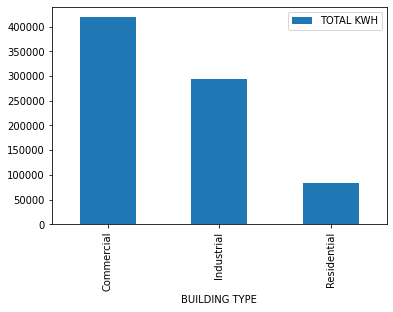

In [20]:
#Analyzing Building Type vs Total KWH energy consumption by plotting a bar graph
df1 = bdf[['BUILDING TYPE', 'TOTAL KWH']]
df1 = df1.groupby(['BUILDING TYPE']).mean().plot(kind='bar')

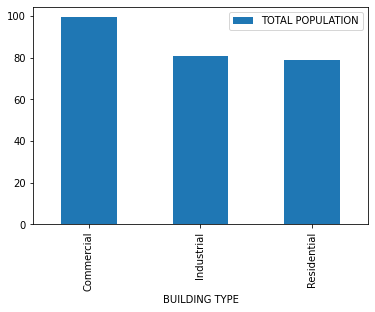

In [21]:
#Analyzing Building Type vs Total population by plotting a bar graph
df2 = bdf[['BUILDING TYPE', 'TOTAL POPULATION']]
df2 = df2.groupby(['BUILDING TYPE']).mean().plot(kind='bar')

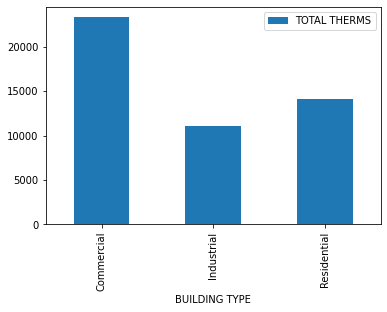

In [22]:
#Analyzing Building Type vs Total THERMS consumption by plotting a bar graph
df3 = bdf[['BUILDING TYPE', 'TOTAL THERMS']]
df3 = df3.groupby(['BUILDING TYPE']).mean().plot(kind='bar')

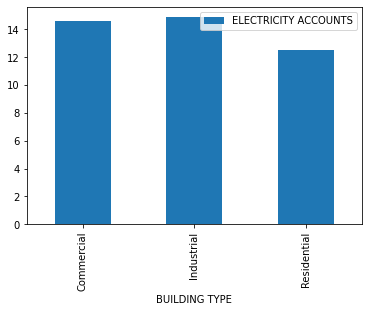

In [23]:
#Looking at which building types have on an average how many electricity accounts
df4 = bdf[['BUILDING TYPE', 'ELECTRICITY ACCOUNTS']]
df4 = df4.groupby(['BUILDING TYPE']).mean().plot(kind='bar')

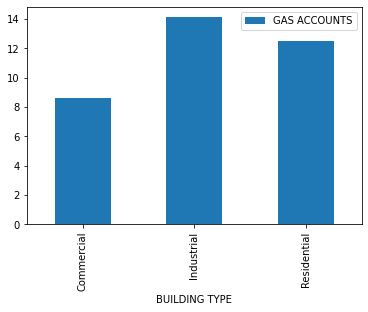

In [24]:
#Looking at which building types have on an average how many gas account
df5 = bdf[['BUILDING TYPE', 'GAS ACCOUNTS']]
df5 = df5.groupby(['BUILDING TYPE']).mean().plot(kind='bar')

### Hypothesis 1 holds true as we can clearly see from above graphs that the commercial sector consumes more electricity than any other sector.

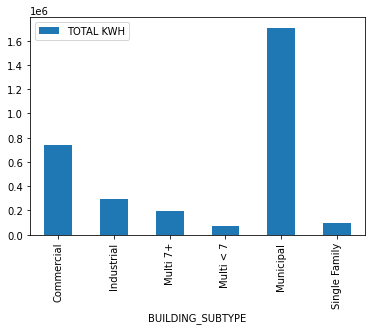

In [25]:
#Which building sub type consumes how much electricity?
df8 = bdf[['BUILDING_SUBTYPE', 'TOTAL KWH']]
df8 = df8.groupby(['BUILDING_SUBTYPE']).mean().plot(kind='bar')

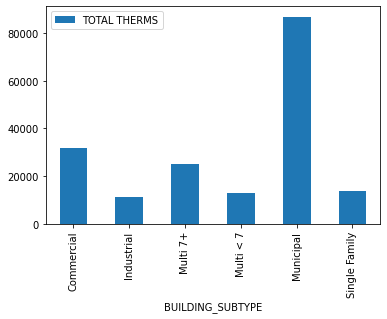

In [26]:
#Which building sub type consumes how much gas?
df9 = bdf[['BUILDING_SUBTYPE', 'TOTAL THERMS']]
df9 = df9.groupby(['BUILDING_SUBTYPE']).mean().plot(kind='bar')

In [27]:
#How many community areas we have? Also, looking at what community areas we have.
bdf['COMMUNITY AREA NAME'].value_counts()

West Town          2768
Austin             2430
Logan Square       2279
Lakeview           1988
Belmont Cragin     1750
                   ... 
Burnside            112
Near South Side     111
O'Hare              104
Oakland             103
Riverdale            40
Name: COMMUNITY AREA NAME, Length: 77, dtype: int64

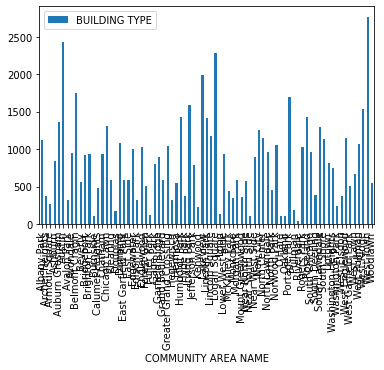

In [28]:
#Analyzing community area vs building type
df6 = bdf[['COMMUNITY AREA NAME', 'BUILDING TYPE']]
df6 = df6.groupby(['COMMUNITY AREA NAME']).count().plot(kind='bar')

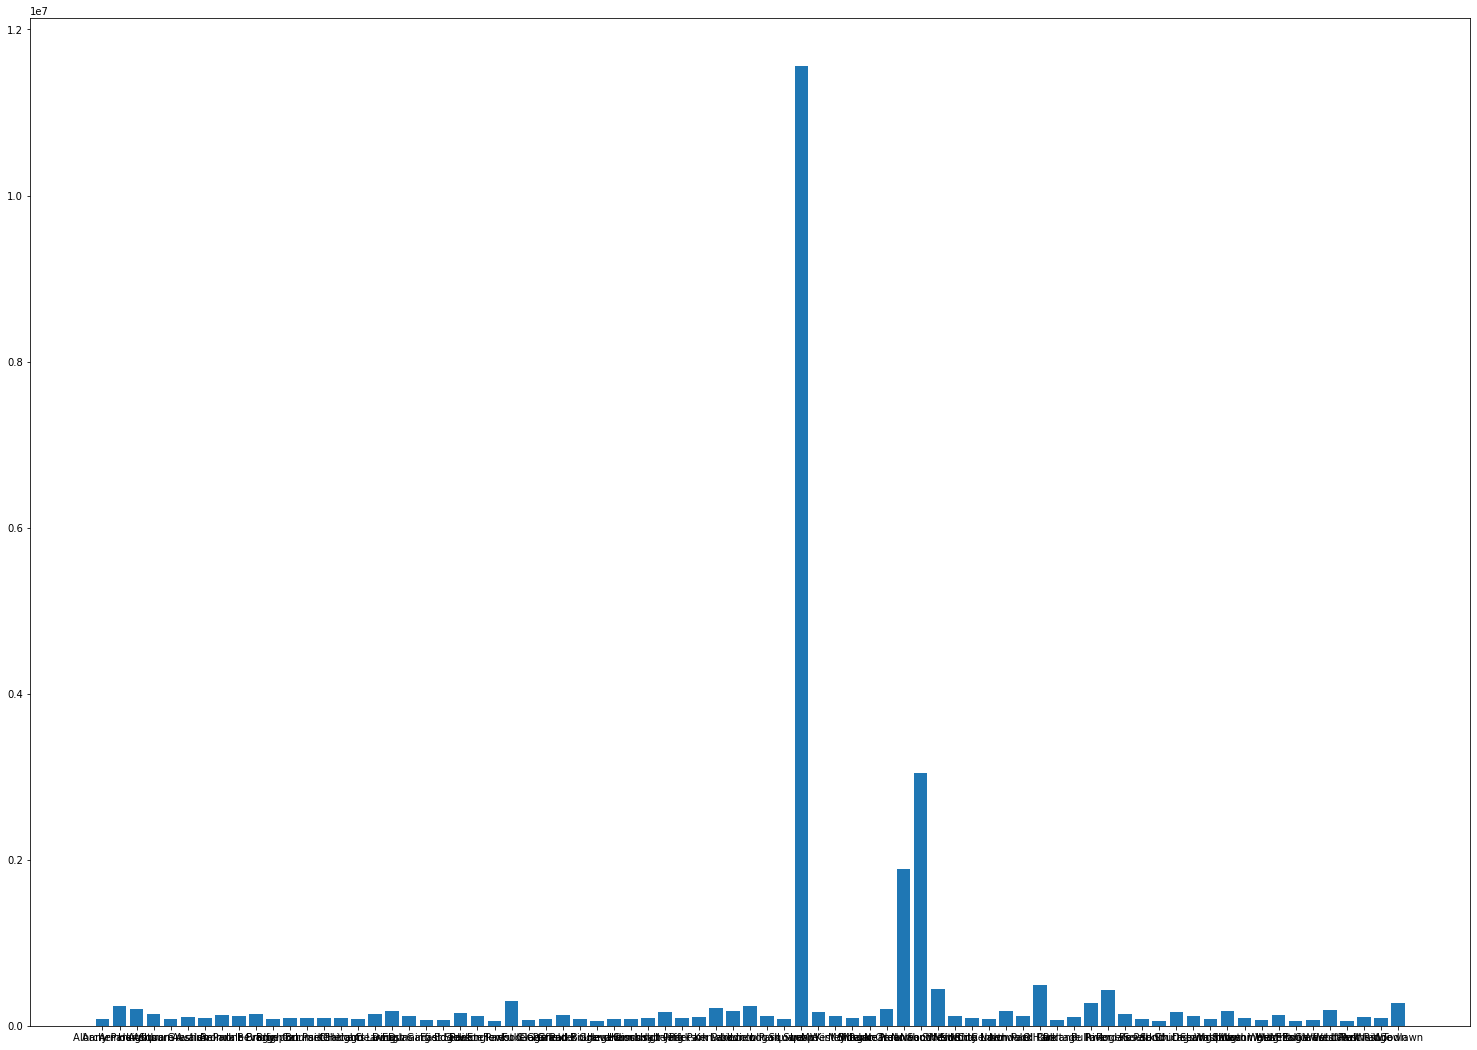

In [29]:
#Plotting which community area consumes how much electricity
import matplotlib.pyplot as plt
df7 = bdf[['COMMUNITY AREA NAME', 'TOTAL KWH']]
df7 = df7.groupby(['COMMUNITY AREA NAME']).mean()
fig = plt.figure(figsize=(20, 14))
ax = fig.add_axes([0,0,1,1])
ax.bar(df7.index,df7['TOTAL KWH'])
plt.show()

In [30]:
#Sorting community area names by descending order of electricity consumed. Getting top 10.
df7.sort_values(by=['TOTAL KWH'], inplace=True, ascending=False)
df7.head(10)

,TOTAL KWH
COMMUNITY AREA NAME,
Loop,1.156227e+07
Near South Side,3.044660e+06
Near North Side,1.886098e+06
O'Hare,4.896845e+05
Near West Side,4.468350e+05
Riverdale,4.307960e+05
Forest Glen,2.973241e+05
Woodlawn,2.691229e+05
Pullman,2.688752e+05


In [31]:
#Checking how much electricity West Town consumes for checking hypothesis
df7.loc[df7.index == 'West Town']

,TOTAL KWH
COMMUNITY AREA NAME,
West Town,92024.955564


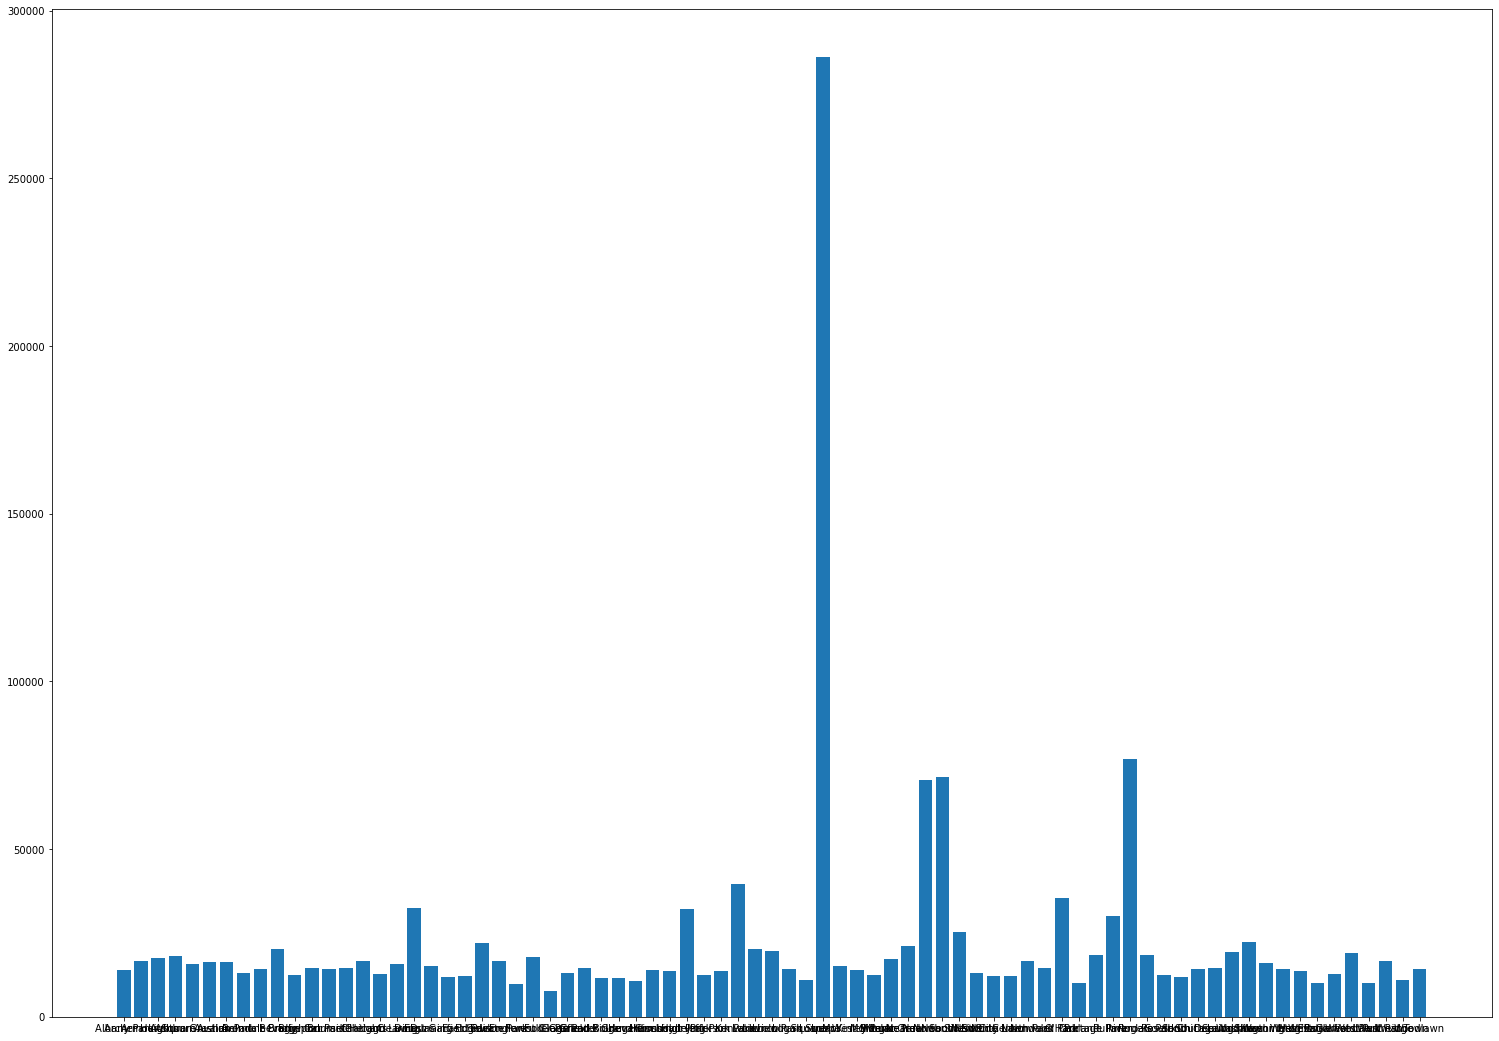

In [32]:
#Plotting which community area consumes how much gas
df9 = bdf[['COMMUNITY AREA NAME', 'TOTAL THERMS']]
df9 = df9.groupby(['COMMUNITY AREA NAME']).mean()
fig = plt.figure(figsize=(20,14))
ax = fig.add_axes([0,0,1,1])
ax.bar(df9.index,df9['TOTAL THERMS'])
plt.show()

In [33]:
#Sorting community area names by descending order of gas consumed. Getting top 10.
df9.sort_values(by=['TOTAL THERMS'], inplace=True, ascending=False)
df9.head(10)

,TOTAL THERMS
COMMUNITY AREA NAME,
Loop,286245.204545
Riverdale,76983.675000
Near South Side,71504.243243
Near North Side,70698.620690
Kenwood,39548.008696
O'Hare,35318.846154
Douglas,32424.364706
Hyde Park,32239.933862
Pullman,30018.901639


In [34]:
#Looking at Loop area information to figure out why it consumes so much electricity.
loop_df = bdf.loc[bdf['COMMUNITY AREA NAME'] == 'Loop']
loop_df

,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,BUILDING_SUBTYPE,BUILDING TYPE,COMMUNITY AREA NAME,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,KWH MEAN 2010,KWH MAXIMUM 2010,KWH MINIMUM 2010,KWH SQFT MEAN 2010,THERM MEAN 2010,THERM MAXIMUM 2010,THERM MINIMUM 2010,THERMS SQFT MEAN 2010,TOTAL KWH,TOTAL POPULATION,TOTAL THERMS
21928,133.0,0.00,4.00,Multi < 7,Residential,Loop,4,4,77148.0,77148.0,77148.0,1800.0,3941.00,3941.0,3941.0,1800.0,77148.0,0.0,3941.0
38447,4.0,0.00,27.00,Municipal,Commercial,Loop,65,4,20917332.0,20917332.0,20917332.0,894283.0,25345.00,25345.0,25345.0,894283.0,20917332.0,0.0,25345.0
38467,70.5,1.79,35.50,Commercial,Commercial,Loop,608,8,29182928.0,49409144.0,8725536.0,898001.0,50056.25,111710.0,16625.0,898001.0,116731713.0,859.0,200225.0
38469,49.0,0.00,11.25,Commercial,Commercial,Loop,81,6,2477520.0,8499535.0,4480.0,215422.8,37307.33,109754.0,216.0,406314.5,24775203.0,0.0,111922.0
38471,77.0,1.67,14.60,Commercial,Commercial,Loop,69,6,248107.6,460736.0,53590.0,295826.3,18906.25,63236.0,816.0,71375.0,1240538.0,452.0,75625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38619,51.0,1.51,15.75,Commercial,Commercial,Loop,607,2,1115108.0,3772924.0,37192.0,28283.0,159876.00,316465.0,3287.0,14566.0,4460430.0,346.0,319752.0
38620,89.5,1.46,16.50,Commercial,Commercial,Loop,95,2,417574.2,2281102.0,3240.0,140254.0,47943.33,142300.0,532.0,205980.0,2505445.0,130.0,143830.0
38621,57.0,1.73,12.50,Commercial,Commercial,Loop,4,2,2969421.0,5520746.0,418096.0,170689.0,30382.00,58416.0,2348.0,170689.0,5938842.0,88.0,60764.0
38622,78.0,0.00,11.00,Commercial,Commercial,Loop,27,4,1620680.0,1990588.0,1250772.0,62621.0,66938.00,90189.0,43687.0,66213.0,3241360.0,0.0,133876.0


In [35]:
#Describing loop area statistics.
loop_df.describe()

,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,KWH MEAN 2010,KWH MAXIMUM 2010,KWH MINIMUM 2010,KWH SQFT MEAN 2010,THERM MEAN 2010,THERM MAXIMUM 2010,THERM MINIMUM 2010,THERMS SQFT MEAN 2010,TOTAL KWH,TOTAL POPULATION,TOTAL THERMS
count,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,132.000000,1.320000e+02
mean,52.841136,0.762803,18.359091,114.553030,11.628788,5.963552e+06,8.554471e+06,4.180779e+06,4.696319e+05,1.639041e+05,2.282549e+05,1.142544e+05,4.814861e+05,1.156227e+07,186.560606,2.862452e+05
std,32.868512,0.867522,15.555015,228.157817,25.209172,1.369025e+07,1.542973e+07,1.332937e+07,7.721488e+05,5.908630e+05,6.138820e+05,5.889960e+05,8.026165e+05,1.906221e+07,320.231101,6.354450e+05
min,0.000000,0.000000,1.500000,2.000000,2.000000,4.930290e+03,1.219900e+04,4.300000e+02,1.800000e+03,5.180000e+02,5.180000e+02,1.150000e+02,1.800000e+03,1.528800e+04,0.000000,5.180000e+02
25%,29.917500,0.000000,8.000000,9.750000,2.000000,4.343485e+05,1.135198e+06,2.745850e+04,6.547962e+04,1.365440e+04,2.059975e+04,2.043250e+03,6.468567e+04,1.746576e+06,0.000000,2.547025e+04
50%,52.165000,0.000000,14.425000,47.500000,4.000000,1.853472e+06,3.313798e+06,2.748300e+05,1.975538e+05,5.040012e+04,9.831300e+04,9.328000e+03,1.924068e+05,4.892364e+06,1.000000,1.353700e+05
75%,73.687500,1.552500,24.000000,103.500000,8.000000,6.371767e+06,9.409957e+06,2.949770e+06,6.187710e+05,1.430236e+05,2.521840e+05,4.419625e+04,5.989572e+05,1.238685e+07,298.000000,3.092962e+05
max,133.000000,4.000000,110.000000,1904.000000,186.000000,1.412600e+08,1.412582e+08,1.412582e+08,6.548217e+06,6.600274e+06,6.600274e+06,6.600274e+06,6.548217e+06,1.412582e+08,1470.000000,6.600274e+06


In [36]:
#Here we notice that loop area has a lot of commercial buildings. Hence it consumes so much electricity.
loop_df['BUILDING TYPE'].value_counts()

Commercial     127
Residential      5
Name: BUILDING TYPE, dtype: int64

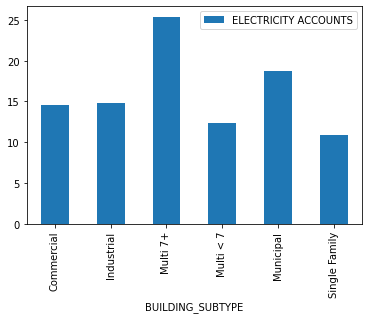

In [37]:
#Seeing what building sub type has how many electricity accounts on average
df10 = bdf[['BUILDING_SUBTYPE', 'ELECTRICITY ACCOUNTS']]
df10 = df10.groupby(['BUILDING_SUBTYPE']).mean().plot(kind='bar')

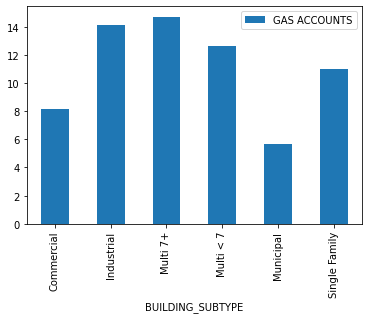

In [38]:
#Seeing what building sub type has how many gas accounts on average
df11 = bdf[['BUILDING_SUBTYPE', 'GAS ACCOUNTS']]
df11 = df11.groupby(['BUILDING_SUBTYPE']).mean().plot(kind='bar')

## This proves Hypothesis 2 is False as we can clearly see that West Town neighborhood uses way less electricity than other neighborhoods like Loop and areas near south side of city.